# Project 6 - Part 2
## Experimenting with linear regression and its variations

## Conclusions

Polynomial fit best describes the trend between age and median household income. It appears that median household income peaks in middle age, and retreats negatively between the elderly and adolescent populations.

In [1]:
import seaborn as sb
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

This project is a formalization of In-Class Project 8: Beyond Simple Linear Regression.  Specifically, use multiple linear regression and polynomial regression to develop fitted models and make predictions.   

1. Find nhanes.csv in my GitHub repository (A-Data) and copy it to the directory/folder where you are working on Project 7.   No hard-coded PATH this time.  
2. Find 7-4.ipynb in …/CPSC222/G-Regression
3. Using nhanes.csv determine which, if any, of models studied in sections 7-1,7-2,7-4 age best fit the the relationship between age Age) and income (HHIncomeMi).  
4. Specifically, plot  age against income using the display and analytic techniques found in cells 5,6,7,8,9,10,11 in 7-4.ipynb.
5. Write you conclusions at the top of the notebook using markdown,


In [2]:
df = pd.read_csv("nhanes.csv")
df = df.dropna(subset=['Age', 'HHIncomeMid'])
print(df.info(verbose=True))
print(df.shape)
print(df[['Age', 'HHIncomeMid']].head())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 9189 entries, 0 to 9999
Data columns (total 76 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                9189 non-null   int64  
 1   SurveyYr          9189 non-null   object 
 2   Gender            9189 non-null   object 
 3   Age               9189 non-null   int64  
 4   AgeDecade         8892 non-null   object 
 5   AgeMonths         4532 non-null   float64
 6   Race1             9189 non-null   object 
 7   Race3             4623 non-null   object 
 8   Education         6622 non-null   object 
 9   MaritalStatus     6630 non-null   object 
 10  HHIncome          9189 non-null   object 
 11  HHIncomeMid       9189 non-null   float64
 12  Poverty           9173 non-null   float64
 13  HomeRooms         9184 non-null   float64
 14  HomeOwn           9185 non-null   object 
 15  Work              7100 non-null   object 
 16  Weight            9120 non-null   float64
 17  

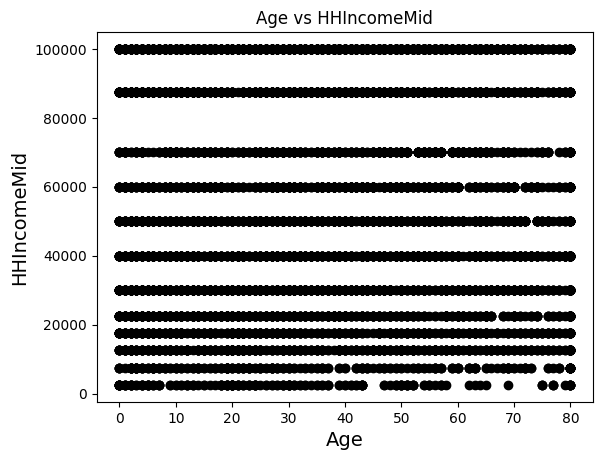

In [3]:
# Store relevant columns as variables
X = df[['Age']].values.reshape(-1, 1)
y = df[['HHIncomeMid']].values.reshape(-1, 1)

# Plot Age vs HHIncomeMid
plt.scatter(X[:, 0], y, color='black')
plt.xlabel('Age', fontsize=14)
plt.ylabel('HHIncomeMid', fontsize=14)
plt.title('Age vs HHIncomeMid')
plt.show()

In [4]:
# Fit a least squares multiple linear regression model
linModel = LinearRegression()
linModel.fit(X, y)

# Write the least squares model as an equation
print(
    "Predicted HHIncomeMid = ",
    linModel.intercept_[0],
    " + ",
    linModel.coef_[0][0],
    "* (Age)"
)

Predicted HHIncomeMid =  56105.07903052022  +  30.078418444787133 * (Age)


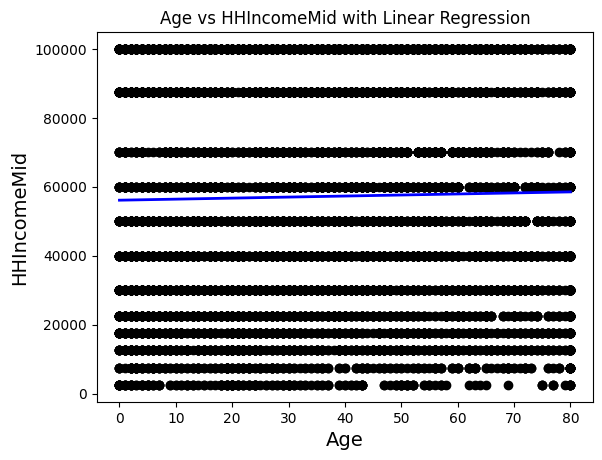

In [5]:
# Plot the regression line
plt.scatter(X[:, 0], y, color='black')
xDelta = np.linspace(X[:, 0].min(), X[:, 0].max(), 1000)
yDelta = linModel.predict(xDelta.reshape(-1, 1))
plt.plot(xDelta, yDelta, color='blue', linewidth=2)
plt.xlabel('Age', fontsize=14)
plt.ylabel('HHIncomeMid', fontsize=14)
plt.title('Age vs HHIncomeMid with Linear Regression')
plt.show()

In [10]:
# Make a prediction
yPredicted = linModel.predict([[50]])
print(
    "Predicted HHIncomeMid for a person with Age = 50 \n",
    "using the linear regression is HHIncomeMid =",
    yPredicted[0][0],
)

Predicted HHIncomeMid for a person with Age = 50 
 using the linear regression is HHIncomeMid = 57608.99995275957


Predicted HHIncomeMid = 47341.77413224681 + 722.7612220315079 * (Age) + -9.015068056637164 * (Age)^2


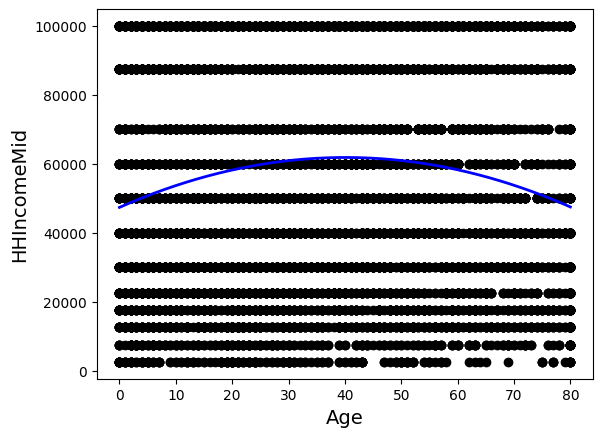

In [12]:
polyFeatures = PolynomialFeatures(degree=2, include_bias=False)
xPoly = polyFeatures.fit_transform(X)
polyModel = LinearRegression()
polyModel.fit(xPoly, y)

plt.scatter(X, y, color='black')
xDelta = np.linspace(X.min(), X.max(), 1000)
yDelta = polyModel.predict(polyFeatures.fit_transform(xDelta.reshape(-1, 1)))
plt.plot(xDelta, yDelta, color='blue', linewidth=2)
plt.xlabel('Age', fontsize=14)
plt.ylabel('HHIncomeMid', fontsize=14)

print(
    "Predicted HHIncomeMid =",
    polyModel.intercept_[0],
    "+",
    polyModel.coef_[0][0],
    "* (Age)",
    "+",
    polyModel.coef_[0][1],
    "* (Age)^2",
)

In [8]:
# Make a prediction
polyInputs = polyFeatures.fit_transform([[50]])
yPolyPredicted = polyModel.predict(polyInputs)
print(
    "Predicted HHIncomeMid for a person with Age = 50 \n",
    "using the simple polynomial regression is HHIncomeMid =",
    yPolyPredicted[0][0],
)

Predicted HHIncomeMid for a person with Age = 50 
 using the simple polynomial regression is HHIncomeMid = 60942.16509222929


In [9]:
# Fit a quadratic regression model using Age
polyFeatures2 = PolynomialFeatures(degree=2, include_bias=False)
xPoly2 = polyFeatures2.fit_transform(X)
polyModel2 = LinearRegression()
polyModel2.fit(xPoly2, y)

# Write the quadratic regression as an equation
print(
    "Predicted HHIncomeMid =", polyModel2.intercept_[0], "\n",
    " + ", polyModel2.coef_[0][0], "* (Age)\n",
    " + ", polyModel2.coef_[0][1], "* (Age)^2 \n",
)

Predicted HHIncomeMid = 47341.77413224681 
  +  722.7612220315079 * (Age)
  +  -9.015068056637164 * (Age)^2 

